<a href="https://colab.research.google.com/github/VictoriaXinyi/Twitter/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pydotplus
#!pip install graphviz

In [ ]:
# Imports

import glob
import string
import ast

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
from scipy import interp
from itertools import cycle
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier


#metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import precision_recall_fscore_support, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

from google.colab import drive  

In [ ]:
drive.mount('/content/gdrive')
path = './gdrive/My Drive'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
hashtag_matrix=pd.read_csv('gdrive/My Drive/hashtag_matrix.csv')

In [ ]:
hashtag_matrix.head(1)

,Unnamed: 0,Dominant_Topic,#blacklivesmatter,#photography,#bitcoin,#tiktok,#lgbt,#pubg,#animation,#weather,#wallstreet,#pdx911,#love,#art,#gay,#lgbtq,#music,#blm,#photooftheday,#soccer,#covid19,#sipgrab,#unitingpeoplewiththepossibilities,#pubgmobile,#nature,#cryptocurrency,#crypto,#btc,#travel,#photo,#covid,#cat,#pride,#pizza,#instagram,#mars,#ethereum,#photographer,#instagood,#gaming,...,#iphone,#youtube,#fashion,#queer,#biden,#kobe,#artist,#breonnataylor,#stockmarket,#beautiful,#loveislove,#georgefloyd,#picoftheday,#toronto,#oscars,#covid_19,#trading,#twitch,#nyc,#naturephotography,#gaypride,#lesbian,#investing,#follow,#anime,#instagay,#stocks,#bisexual,#money,#defundthepolice,#california,#design,#coronavirus,#motivation,#lgbtqia,#football,#binance,#business,#gayman,#verizon5gaccess
0,0,31.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
indexNames = hashtag_matrix[   
    (hashtag_matrix['#blacklivesmatter'] == 0) &     
    (hashtag_matrix['#photography'] == 0) &
    (hashtag_matrix['#bitcoin'] == 0) &
    (hashtag_matrix['#tiktok'] == 0) &
    (hashtag_matrix['#lgbt'] == 0) &
    (hashtag_matrix['#pubg'] == 0) &
    (hashtag_matrix['#animation'] == 0) &
    (hashtag_matrix['#wallstreet'] == 0) &
    (hashtag_matrix['#pdx911'] == 0) &
    (hashtag_matrix['#weather'] == 0) &
    (hashtag_matrix['#stocks'] == 0) &
    (hashtag_matrix['#anime'] == 0) &
    (hashtag_matrix['#blm'] == 0) &
    (hashtag_matrix['#gay'] == 0) &
    (hashtag_matrix['#love'] == 0) &
    (hashtag_matrix['#art'] == 0) &
    (hashtag_matrix['#music'] == 0) &
    (hashtag_matrix['#lgbtq'] == 0) &
    (hashtag_matrix['#photooftheday'] == 0) &
    (hashtag_matrix['#sipgrab'] == 0) &
    (hashtag_matrix['#unitingpeoplewiththepossibilities'] == 0) &
    (hashtag_matrix['#gaming'] == 0) &
    (hashtag_matrix['#soccer'] == 0) &
    (hashtag_matrix['#btc'] == 0) &    
    (hashtag_matrix['#covid19'] == 0) &
    (hashtag_matrix['#pubgmobile'] == 0) &
    (hashtag_matrix['#nature'] == 0) &
    (hashtag_matrix['#cryptocurrency'] == 0) &
    (hashtag_matrix['#verizon5gaccess'] == 0) &
    (hashtag_matrix['#crypto'] == 0) &
    (hashtag_matrix['#cat'] == 0) &
    (hashtag_matrix['#nifty'] == 0) &
    (hashtag_matrix['#photo'] == 0) &
    (hashtag_matrix['#pizza'] == 0) &
    (hashtag_matrix['#travel'] == 0) &
    (hashtag_matrix['#mars'] == 0) &
    (hashtag_matrix['#covid'] == 0) &
    (hashtag_matrix['#pride'] == 0) &
    (hashtag_matrix['#iphone'] == 0) &
    (hashtag_matrix['#instagram'] == 0) &
    (hashtag_matrix['#ethereum'] == 0) &
    (hashtag_matrix['#toronto'] == 0) &
    (hashtag_matrix['#photographer'] == 0) &    
    (hashtag_matrix['#biden'] == 0) &
    (hashtag_matrix['#kobe'] == 0) &  
    (hashtag_matrix['#georgefloyd'] == 0) & 
    (hashtag_matrix['#instagood'] == 0) &
    (hashtag_matrix['#dogecoin'] == 0) &
    (hashtag_matrix['#gayman'] == 0) &
    (hashtag_matrix['#youtube'] == 0) &
    (hashtag_matrix['#california'] == 0) &        
    (hashtag_matrix['#beautiful'] == 0) &
    (hashtag_matrix['#picoftheday'] == 0) &
    (hashtag_matrix['#loveislove'] == 0) &
    (hashtag_matrix['#motivation'] == 0) &
    (hashtag_matrix['#queer'] == 0) &
    (hashtag_matrix['#nyc'] == 0) &
    (hashtag_matrix['#naturephotography'] == 0) &
    (hashtag_matrix['#lesbian'] == 0) &
    (hashtag_matrix['#football'] == 0) &
    (hashtag_matrix['#binance'] == 0) &
    (hashtag_matrix['#stockmarket'] == 0) &
    (hashtag_matrix['#artist'] == 0) &
    (hashtag_matrix['#lgbtqia'] == 0) &
    (hashtag_matrix['#follow'] == 0) &
    (hashtag_matrix['#instagay'] == 0) &
    (hashtag_matrix['#bisexual'] == 0) &
    (hashtag_matrix['#fashion'] == 0) &
    (hashtag_matrix['#trading'] == 0) &
    (hashtag_matrix['#coronavirus'] == 0) &
    (hashtag_matrix['#defundthepolice'] == 0) &
    (hashtag_matrix['#twitch'] == 0) &
    (hashtag_matrix['#covid_19'] == 0) &
    (hashtag_matrix['#oscars'] == 0) &
    (hashtag_matrix['#breonnataylor'] == 0) &
    (hashtag_matrix['#business'] == 0) &
    (hashtag_matrix['#gaypride'] == 0) &
    (hashtag_matrix['#design'] == 0) &
    (hashtag_matrix['#investing'] == 0) &
    (hashtag_matrix['#money'] == 0) 
    ].index
matrix=hashtag_matrix.drop(indexNames , inplace=True)
matrix=hashtag_matrix.copy()

In [ ]:
matrix

,Unnamed: 0,Dominant_Topic,#blacklivesmatter,#photography,#bitcoin,#tiktok,#lgbt,#pubg,#animation,#weather,#wallstreet,#pdx911,#love,#art,#gay,#lgbtq,#music,#blm,#photooftheday,#soccer,#covid19,#sipgrab,#unitingpeoplewiththepossibilities,#pubgmobile,#nature,#cryptocurrency,#crypto,#btc,#travel,#photo,#covid,#cat,#pride,#pizza,#instagram,#mars,#ethereum,#photographer,#instagood,#gaming,...,#iphone,#youtube,#fashion,#queer,#biden,#kobe,#artist,#breonnataylor,#stockmarket,#beautiful,#loveislove,#georgefloyd,#picoftheday,#toronto,#oscars,#covid_19,#trading,#twitch,#nyc,#naturephotography,#gaypride,#lesbian,#investing,#follow,#anime,#instagay,#stocks,#bisexual,#money,#defundthepolice,#california,#design,#coronavirus,#motivation,#lgbtqia,#football,#binance,#business,#gayman,#verizon5gaccess
0,0,31.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,14.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,53.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,10.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,37.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,19994,26.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19995,19995,26.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19996,19996,32.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19997,19997,4.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
All = matrix.drop(['Unnamed: 0'], axis=1)
All.head(1)

,Dominant_Topic,#blacklivesmatter,#photography,#bitcoin,#tiktok,#lgbt,#pubg,#animation,#weather,#wallstreet,#pdx911,#love,#art,#gay,#lgbtq,#music,#blm,#photooftheday,#soccer,#covid19,#sipgrab,#unitingpeoplewiththepossibilities,#pubgmobile,#nature,#cryptocurrency,#crypto,#btc,#travel,#photo,#covid,#cat,#pride,#pizza,#instagram,#mars,#ethereum,#photographer,#instagood,#gaming,#dogecoin,...,#iphone,#youtube,#fashion,#queer,#biden,#kobe,#artist,#breonnataylor,#stockmarket,#beautiful,#loveislove,#georgefloyd,#picoftheday,#toronto,#oscars,#covid_19,#trading,#twitch,#nyc,#naturephotography,#gaypride,#lesbian,#investing,#follow,#anime,#instagay,#stocks,#bisexual,#money,#defundthepolice,#california,#design,#coronavirus,#motivation,#lgbtqia,#football,#binance,#business,#gayman,#verizon5gaccess
0,31.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
All.Dominant_Topic.nunique()

54

In [ ]:
#list(All.columns)

In [ ]:
#All['Dominant_Topic'] = All['Dominant_Topic'].replace('31.0','T31')
All['Dominant_Topic'].replace({0.0: "T0", 1.0: "T1", 2.0: "T2", 3.0: "T3", 4.0: "T4", 5.0: "T5",6.0: "T6", 7.0: "T7", 8.0: "T8",9.0: "T9", 10.0: "T10",
                               11.0: "T11", 12.0: "T12", 13.0: "T13", 14.0: "T14", 15.0: "T15",16.0: "T16", 17.0: "T17", 18.0: "T18",19.0: "T19", 20.0: "T20",
                               21.0: "T21", 22.0: "T22", 23.0: "T23", 24.0: "T24", 25.0: "T25",26.0: "T26", 27.0: "T27", 28.0: "T28",29.0: "T29", 30.0: "T30",
                               31.0: "T31", 32.0: "T32", 33.0: "T33", 34.0: "T34", 35.0: "T35",36.0: "T36", 37.0: "T37", 38.0: "T38",39.0: "T39", 40.0: "T40",
                               41.0: "T41", 42.0: "T42", 43.0: "T43", 44.0: "T44", 45.0: "T45",46.0: "T46", 47.0: "T47", 48.0: "T48",49.0: "T49", 50.0: "T50",
                               51.0: "T51", 52.0: "T52", 53.0: "T53", 54.0: "T54"}, inplace=True)
All.head(1)

,Dominant_Topic,#blacklivesmatter,#photography,#bitcoin,#tiktok,#lgbt,#pubg,#animation,#weather,#wallstreet,#pdx911,#love,#art,#gay,#lgbtq,#music,#blm,#photooftheday,#soccer,#covid19,#sipgrab,#unitingpeoplewiththepossibilities,#pubgmobile,#nature,#cryptocurrency,#crypto,#btc,#travel,#photo,#covid,#cat,#pride,#pizza,#instagram,#mars,#ethereum,#photographer,#instagood,#gaming,#dogecoin,...,#iphone,#youtube,#fashion,#queer,#biden,#kobe,#artist,#breonnataylor,#stockmarket,#beautiful,#loveislove,#georgefloyd,#picoftheday,#toronto,#oscars,#covid_19,#trading,#twitch,#nyc,#naturephotography,#gaypride,#lesbian,#investing,#follow,#anime,#instagay,#stocks,#bisexual,#money,#defundthepolice,#california,#design,#coronavirus,#motivation,#lgbtqia,#football,#binance,#business,#gayman,#verizon5gaccess
0,T31,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
#All.info()

In [ ]:
class_names = ['T0','T1', 'T2', 'T3', 'T4','T5','T6','T7','T8','T9','T10',
                 'T11', 'T12', 'T13', 'T14','T15','T16','T17','T18','T19','T20',
                 'T21', 'T22', 'T23', 'T24','T25','T26','T27','T28','T29','T30',
                 'T31', 'T32', 'T33', 'T34','T35','T36','T37','T38','T39','T40',
                 'T41', 'T42', 'T43', 'T44','T45','T46','T47','T48','T49','T50',
                 'T51', 'T52', 'T53'                
                 ]
feature_names = ['#blacklivesmatter',
 '#photography',
 '#bitcoin',
 '#tiktok',
 '#lgbt',
 '#pubg',
 '#animation',
 '#weather',
 '#wallstreet',
 '#pdx911',
 '#love',
 '#art',
 '#gay',
 '#lgbtq',
 '#music',
 '#blm',
 '#photooftheday',
 '#soccer',
 '#covid19',
 '#sipgrab',
 '#unitingpeoplewiththepossibilities',
 '#pubgmobile',
 '#nature',
 '#cryptocurrency',
 '#crypto',
 '#btc',
 '#travel',
 '#photo',
 '#covid',
 '#cat',
 '#pride',
 '#pizza',
 '#instagram',
 '#mars',
 '#ethereum',
 '#photographer',
 '#instagood',
 '#gaming',
 '#dogecoin',
 '#nifty',
 '#iphone',
 '#youtube',
 '#fashion',
 '#queer',
 '#biden',
 '#kobe',
 '#artist',
 '#breonnataylor',
 '#stockmarket',
 '#beautiful',
 '#loveislove',
 '#georgefloyd',
 '#picoftheday',
 '#toronto',
 '#oscars',
 '#covid_19',
 '#trading',
 '#twitch',
 '#nyc',
 '#naturephotography',
 '#gaypride',
 '#lesbian',
 '#investing',
 '#follow',
 '#anime',
 '#instagay',
 '#stocks',
 '#bisexual',
 '#money',
 '#defundthepolice',
 '#california',
 '#design',
 '#coronavirus',
 '#motivation',
 '#lgbtqia',
 '#football',
 '#binance',
 '#business',
 '#gayman',
 '#verizon5gaccess']

In [ ]:
X = All.drop(['Dominant_Topic'], axis=1)
y = All['Dominant_Topic']

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 100)

In [ ]:
# Decision tree model
# Decision Tree
classifier = DecisionTreeClassifier()

parameters = {#'criterion':['entropy'],
              'max_depth': [2, 3, 5, 6, 8, 10], 
              'min_samples_split': [10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10, 30]            
             }

acc_scorer = make_scorer(accuracy_score)
#grid search
grid_obj = GridSearchCV(classifier, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf1 = grid_obj.best_estimator_

clf1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Model performance on training set
y_pred_train =clf1.predict(X_train)

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

accuracy = metrics.accuracy_score(y_train, y_pred_train)
#print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cm)
#print(classification_report(y_train, y_pred_train,target_names=class_names))

Confusion Matrix: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
q=classification_report(y_train, y_pred_train,target_names=class_names,output_dict=True) 
p = pd.DataFrame(q).transpose()
p

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
T0,0.000000,0.000000,0.000000,25.000000
T1,0.000000,0.000000,0.000000,19.000000
T2,0.000000,0.000000,0.000000,62.000000
T3,0.000000,0.000000,0.000000,159.000000
T4,0.000000,0.000000,0.000000,49.000000
T5,0.000000,0.000000,0.000000,31.000000
T6,0.000000,0.000000,0.000000,112.000000
T7,0.000000,0.000000,0.000000,63.000000
T8,0.000000,0.000000,0.000000,74.000000
T9,0.000000,0.000000,0.000000,241.000000


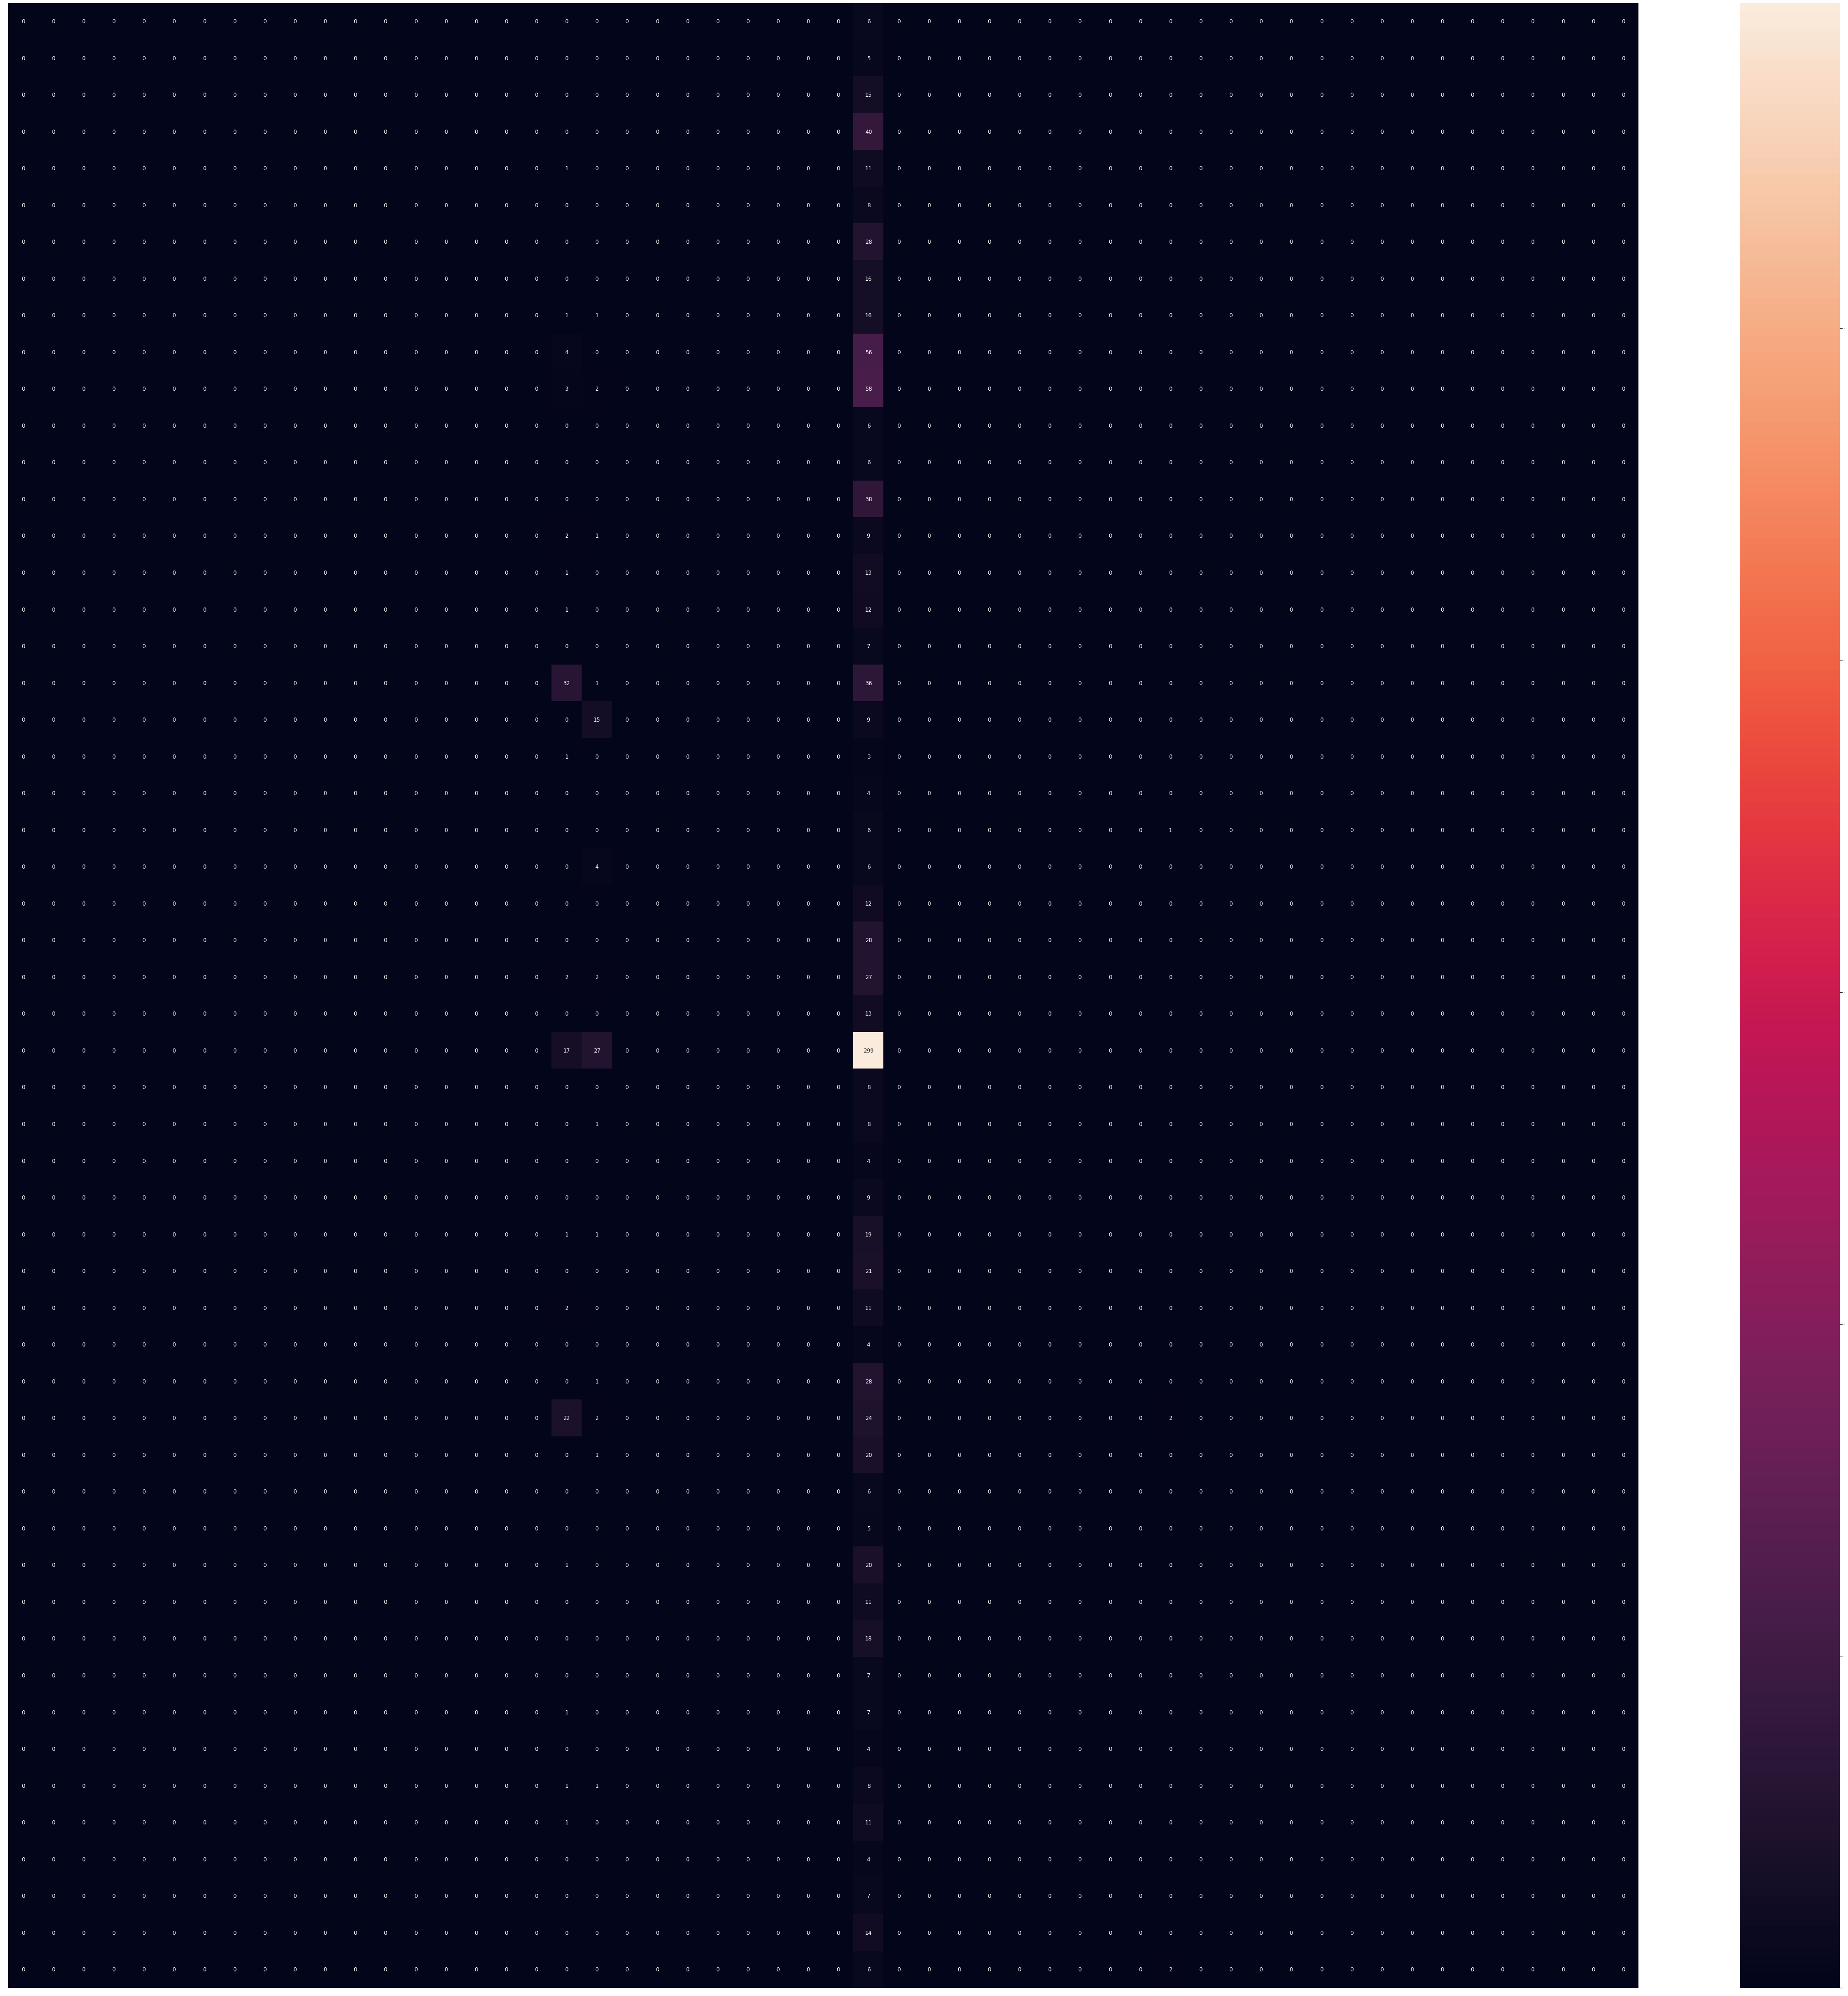

In [ ]:
import seaborn as sns
#ax = sns.heatmap(cm, linewidths=.5,  fmt="", annot_kws={"size": 12}, vmin=0, vmax=100) #annot=df_labels,

fig, ax = plt.subplots(figsize=(80, 80))
sns.heatmap(cm, annot=True, annot_kws={"size": 12},fmt='d',xticklabels=
sorted(class_names), yticklabels = sorted(class_names))
#from google.colab import files
#plt.savefig("cm1.png")
#files.download("cm1.png")

In [ ]:
# Predicting the test results
np.set_printoptions(threshold=np.inf)
y_pred=clf1.predict(X_test)

# Classification results on test set
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
#print("Accuracy: {:.2f}".format(accuracy))

from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred)
#print('Confusion Matrix: \n', cm)
#print(classification_report(y_test, y_pred,target_names=class_names))

In [ ]:
"""
q=classification_report(y_test, y_pred,target_names=class_names,output_dict=True) 
p = pd.DataFrame(q).transpose()
p
"""

'\nq=classification_report(y_test, y_pred,target_names=class_names,output_dict=True) \np = pd.DataFrame(q).transpose()\np\n'

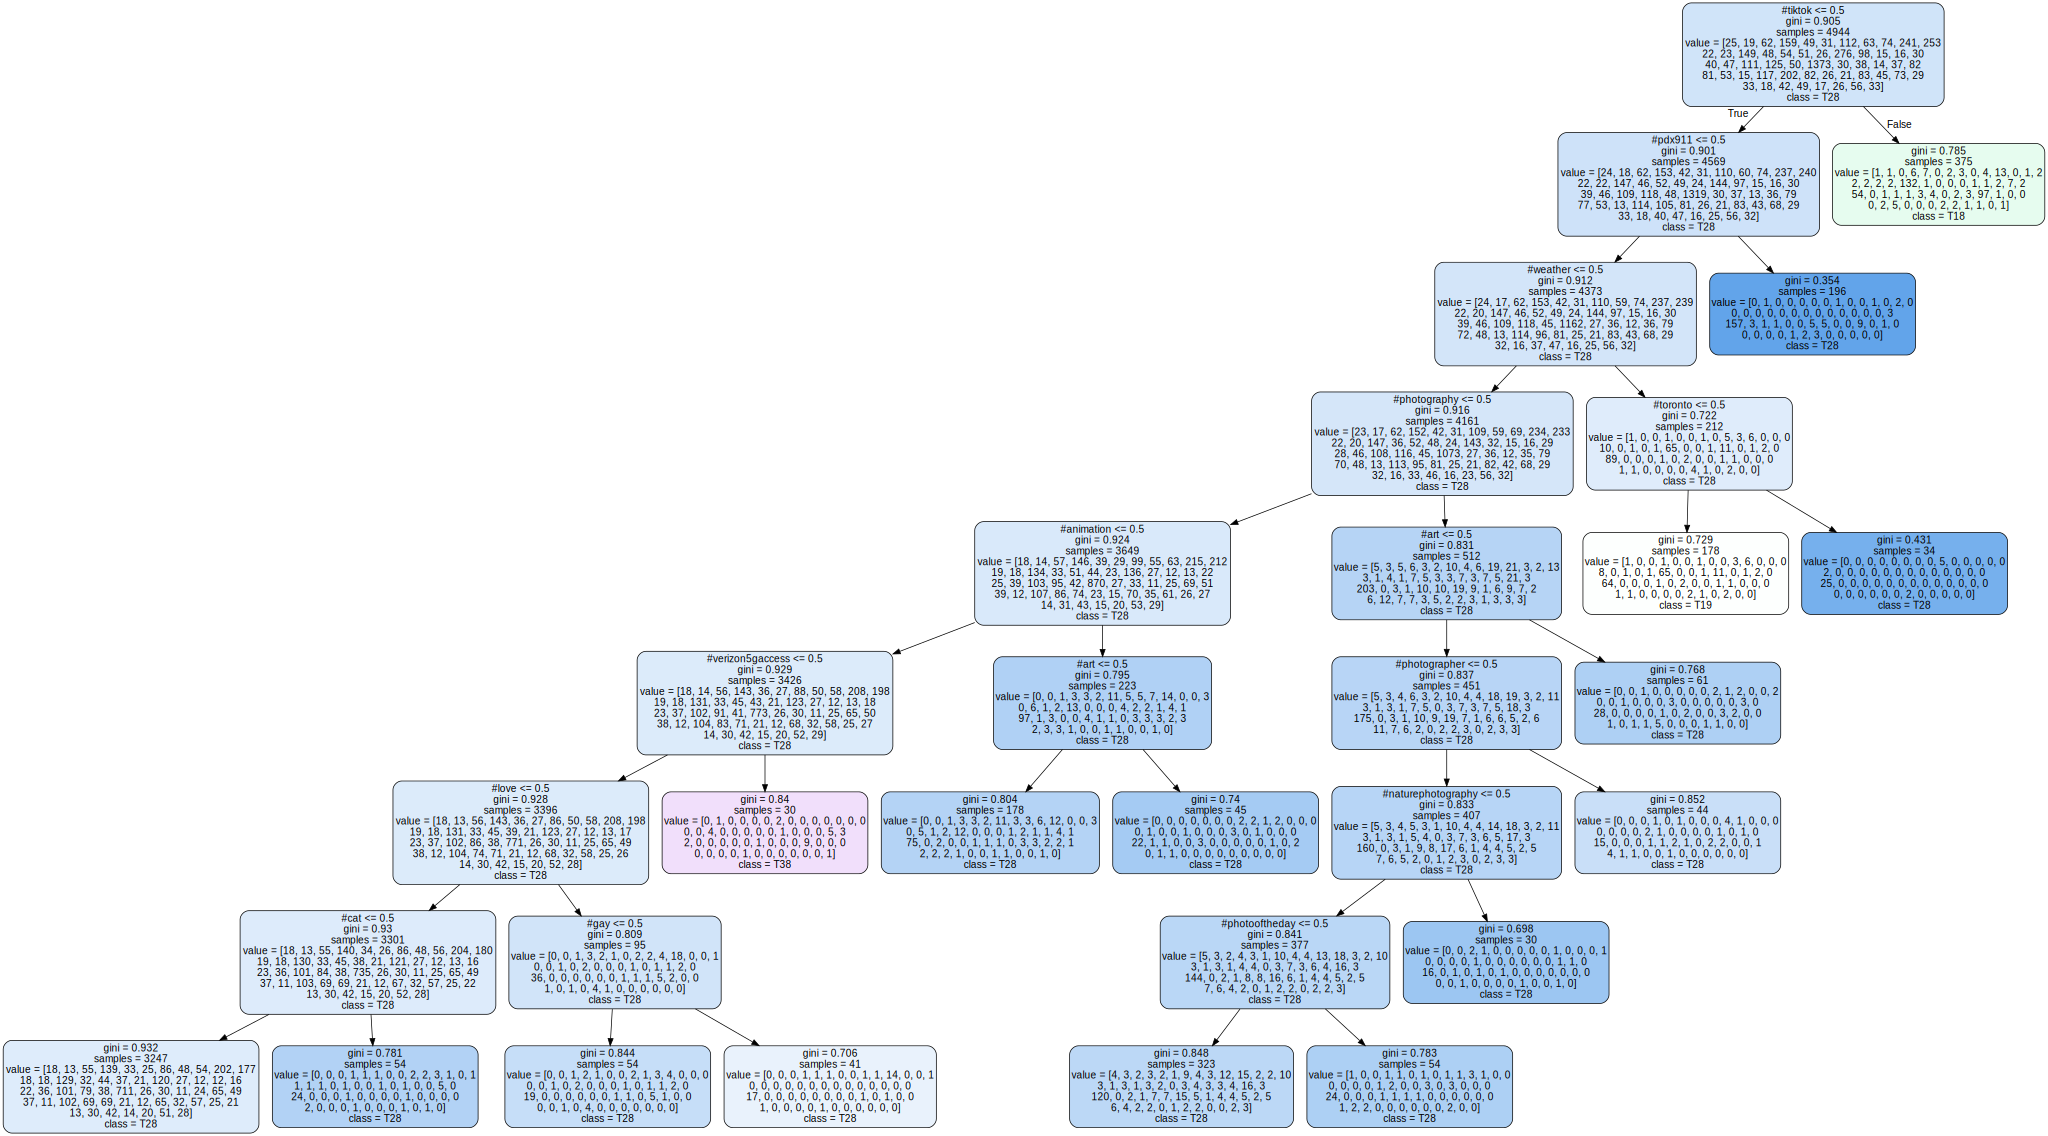

In [ ]:
# Visualize the tree by graphiz
import graphviz
import pydotplus
from sklearn import tree
from google.colab import files

dot_data = tree.export_graphviz(clf1, out_file=None, filled=True, rounded = True,
                                feature_names=feature_names, class_names=class_names)
graph = graphviz.Source(dot_data)
graph
#graph = pydotplus.graph_from_dot_data(dot_data)
#graph.write_pdf('gdrive/My Drive/graph.pdf')
#graph.write_png('gdrive/My Drive/graph.png')

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix, f1_score
predictions = clf1.predict(X_test)
print(accuracy_score(y_test, predictions))
print(np.array(cross_val_score(clf1, X_train, y_train, cv=10)).mean())
#print(f1_score(y_test,predictions,average='micro'))
print(f1_score(y_test,predictions,average='macro'))
print(f1_score(y_test,predictions,average='weighted'))

0.2815533980582524
0.2918680734470208
0.2815533980582524
0.023030276430431967
0.1486620514732273


In [ ]:
"""
import matplotlib.pyplot as plt
import scikitplot as skplt

# Put a legend below current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.0 , box.width, box.height * 1])
ax.legend(loc = 'lower right', bbox_to_anchor = (0.5, -0.15), fancybox = True, 
              shadow = True, ncol = 4, prop = {'size':10})

predicted_probas = clf1.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, predicted_probas)
plt.show()
"""

"\nimport matplotlib.pyplot as plt\nimport scikitplot as skplt\n\n# Put a legend below current axis\nbox = ax.get_position()\nax.set_position([box.x0, box.y0 + box.height * 0.0 , box.width, box.height * 1])\nax.legend(loc = 'lower right', bbox_to_anchor = (0.5, -0.15), fancybox = True, \n              shadow = True, ncol = 4, prop = {'size':10})\n\npredicted_probas = clf1.predict_proba(X_test)\nskplt.metrics.plot_roc(y_test, predicted_probas)\nplt.show()\n"

In [ ]:
"""
from sklearn.metrics import roc_curve, auc
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 54

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred[:,i], pos_label=i)
    
#chooses a random color for plotting
c = (np.random.rand(), np.random.rand(), np.random.rand())

#create a plot and set some options
plt.plot(fpr, tpr, color = c, label = label_string + ' (AUC = %0.3f)' % roc_auc)

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
"""

'\nfrom sklearn.metrics import roc_curve, auc\n# roc curve for classes\nfpr = {}\ntpr = {}\nthresh ={}\n\nn_class = 54\n\nfor i in range(n_class):    \n    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred[:,i], pos_label=i)\n    \n#chooses a random color for plotting\nc = (np.random.rand(), np.random.rand(), np.random.rand())\n\n#create a plot and set some options\nplt.plot(fpr, tpr, color = c, label = label_string + \' (AUC = %0.3f)\' % roc_auc)\n\nplt.plot([0, 1], [0, 1], \'k--\')\nplt.xlim([0.0, 1.0])\nplt.ylim([0.0, 1.0])\nplt.xlabel(\'FPR\')\nplt.ylabel(\'TPR\')\nplt.title(\'ROC\')\nplt.legend(loc="lower right")\n'

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#clf_probs = clf1.predict_proba(X_test)[:, 1]
clf_probs = clf1.predict_proba(X_test)
#clf_probs

In [ ]:
roc_value = roc_auc_score(y_test, clf_probs,multi_class='ovo',average='macro')
print(roc_value)

0.573017803198119


In [ ]:
im1 = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': clf1.feature_importances_}).sort_values('importance', ascending = False)
im1

,feature,importance
3,#tiktok,0.320954
9,#pdx911,0.283225
7,#weather,0.130960
1,#photography,0.066706
6,#animation,0.052464
53,#toronto,0.043339
79,#verizon5gaccess,0.024984
10,#love,0.023403
29,#cat,0.017238
12,#gay,0.011680


In [ ]:
####   Random Forest Model

In [ ]:
#Random forest model
rf_clf1 = RandomForestClassifier()

parameters = {'n_estimators': [10, 20, 25, 50, 100, 300, 500, 800]}

acc_scorer = make_scorer(accuracy_score)

#grid search
grid_obj = GridSearchCV(rf_clf1, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_clf1 = grid_obj.best_estimator_

rf_clf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

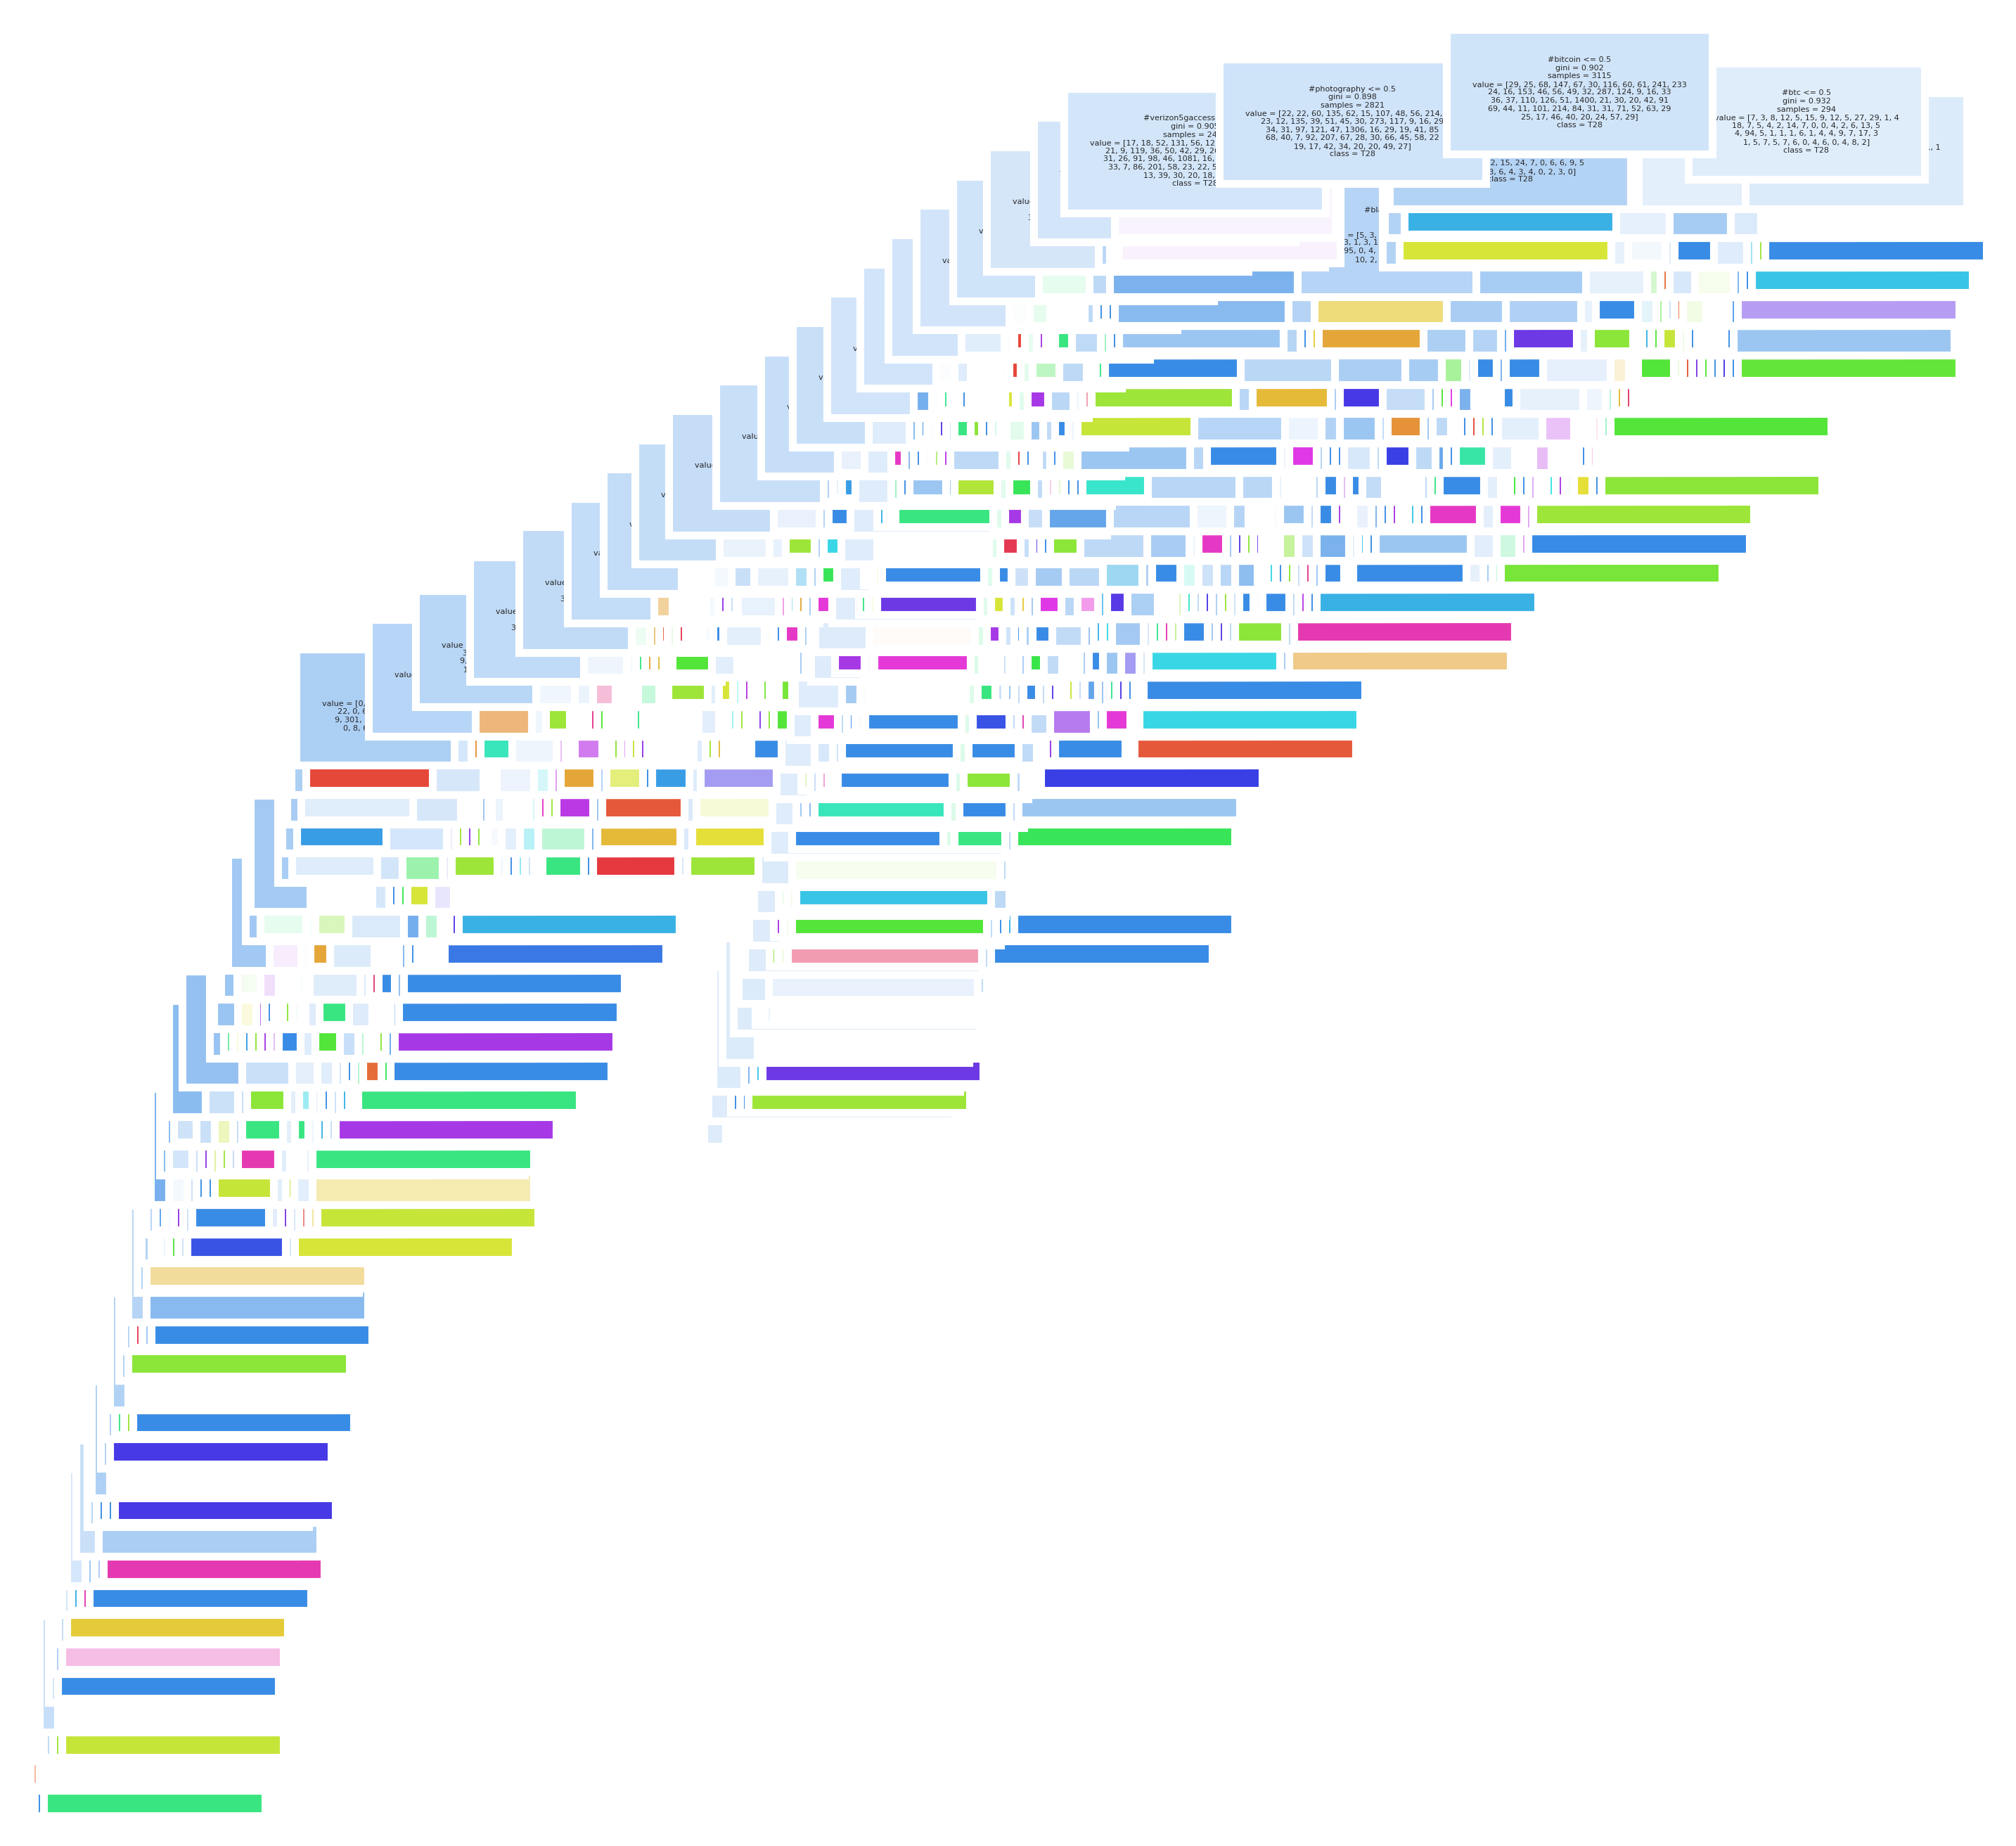

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf_clf1.estimators_[0],
               feature_names = feature_names, 
               class_names=class_names,
               filled = True)
from google.colab import files
plt.savefig('rf_individualtree.png')
files.download('rf_individualtree.png')

In [ ]:
"""
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf_clf1.estimators_[2],
               feature_names = feature_names, 
               class_names=class_names,
               filled = True)
               """

'\nfig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)\ntree.plot_tree(rf_clf1.estimators_[2],\n               feature_names = feature_names, \n               class_names=class_names,\n               filled = True)\n               '

In [ ]:
rf_clf1_predictions = rf_clf1.predict(X_test)
rf_probs = rf_clf1.predict_proba(X_test)

In [ ]:
roc_value = roc_auc_score(y_test, rf_probs,multi_class='ovo',average='macro')
print(roc_value)

0.5886772511056362


In [ ]:
fi1 = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': rf_clf1.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi1

,feature,importance
3,#tiktok,0.066946
9,#pdx911,0.058637
7,#weather,0.029242
10,#love,0.026123
11,#art,0.022669
26,#travel,0.021152
18,#covid19,0.019195
32,#instagram,0.019111
14,#music,0.019024
1,#photography,0.018028


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cm2=confusion_matrix(y_test,rf_clf1_predictions)
print(confusion_matrix(y_test,rf_clf1_predictions))
print(classification_report(y_test,rf_clf1_predictions))
print(accuracy_score(y_test, rf_clf1_predictions))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   6   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   4   0   0   0   0   1   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0  14   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   1   0   0   0   0
    0   0   0   0   0   0   1   0   0   0  35   0   0   0   0   0   0   0
    0   0   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0   0   0   0   0   0   0   0
    1   0   0   0   0   0   0   0 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

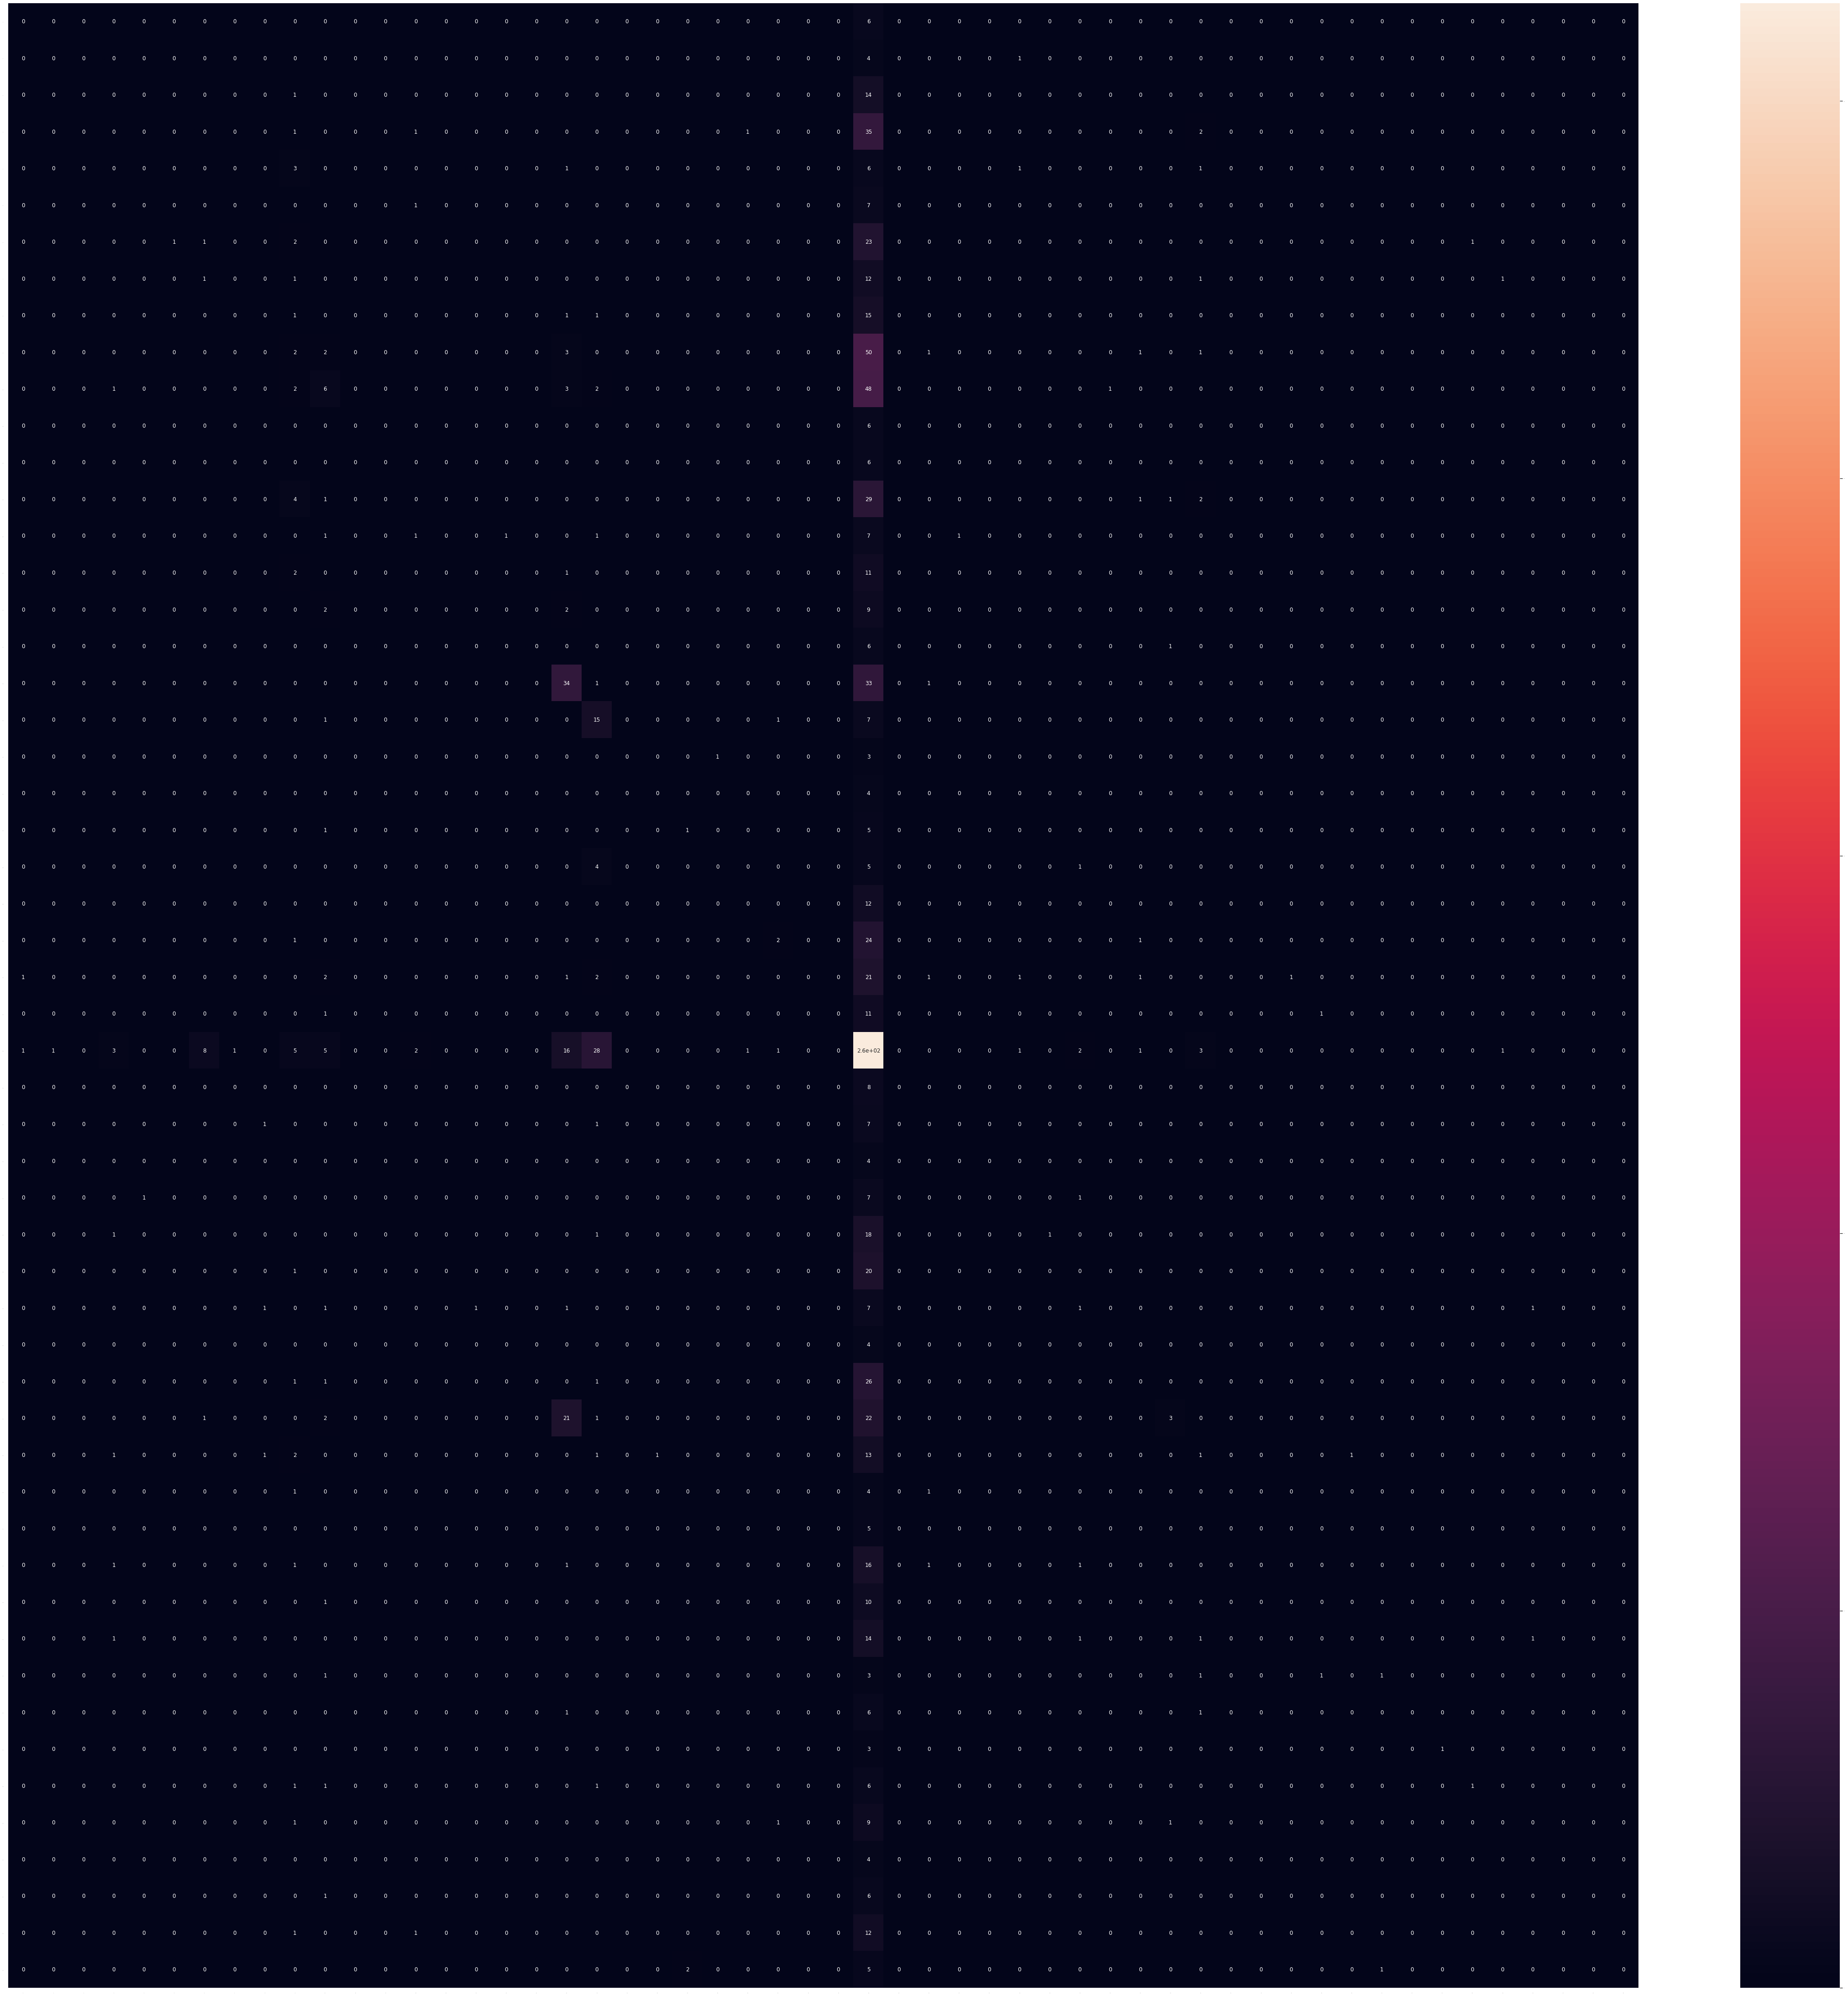

In [ ]:
fig, ax = plt.subplots(figsize=(80, 80))
sns.heatmap(cm2, annot=True, annot_kws={"size": 12})
from google.colab import files
plt.savefig("cm2.png")
files.download("cm2.png")

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada1 = AdaBoostClassifier(base_estimator=rf_clf1, n_estimators=50)
ada1.fit(X_train, y_train)
y1 = ada1.predict(X_test)
accuracy_score(y1, y_test)

0.27427184466019416

In [ ]:
a_svm1 = cross_val_score(ada1, X_train, y_train, cv=10)
print([a_svm1,np.mean(a_svm1)])

[array([0.28686869, 0.27878788, 0.27474747, 0.28282828, 0.28340081,
       0.25708502, 0.2611336 , 0.28137652, 0.29149798, 0.26923077]), 0.2766957019588599]


In [ ]:
## 1. All data split
Train, Test = train_test_split(All, test_size=0.2, random_state=25)
Train.shape, Test.shape

((4934, 81), (1234, 81))

In [ ]:
Train.head(2)

,Dominant_Topic,#blacklivesmatter,#photography,#bitcoin,#tiktok,#lgbt,#pubg,#animation,#weather,#wallstreet,#pdx911,#love,#art,#gay,#lgbtq,#music,#blm,#photooftheday,#soccer,#covid19,#sipgrab,#unitingpeoplewiththepossibilities,#pubgmobile,#nature,#cryptocurrency,#crypto,#btc,#travel,#photo,#covid,#cat,#pride,#pizza,#instagram,#mars,#ethereum,#photographer,#instagood,#gaming,#dogecoin,...,#iphone,#youtube,#fashion,#queer,#biden,#kobe,#artist,#breonnataylor,#stockmarket,#beautiful,#loveislove,#georgefloyd,#picoftheday,#toronto,#oscars,#covid_19,#trading,#twitch,#nyc,#naturephotography,#gaypride,#lesbian,#investing,#follow,#anime,#instagay,#stocks,#bisexual,#money,#defundthepolice,#california,#design,#coronavirus,#motivation,#lgbtqia,#football,#binance,#business,#gayman,#verizon5gaccess
10714,48.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10236,34.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_all = Train.drop(['Dominant_Topic'], axis=1)
y_all = Train['Dominant_Topic']

In [ ]:
#  ---------------- Feature Selection  ----------------   #

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 13 members, which is less than n_splits=20.
  % (min_groups, self.n_splits)), UserWarning)


Optimal number of features : 2


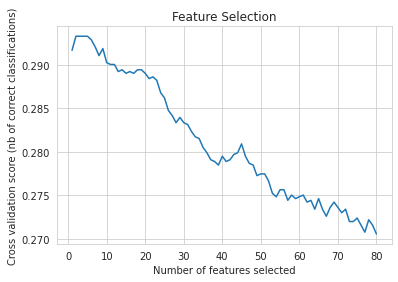

In [ ]:
# Create the RFE object and compute a cross-validated score.
model = ExtraTreesClassifier()
rfecv = RFECV(estimator=model, step=1, cv=StratifiedKFold(20),scoring='accuracy')
rfecv.fit(X_all, y_all)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title('Feature Selection')
plt.show()

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_all, y_all)

#Add features and their importances to a dictionary
feature_imp_dict = dict(zip(X_all.columns.values, model.feature_importances_))

for x in sorted(zip(model.feature_importances_,list(X_all)))[::-1]:
    print (x)

(0.07355139962239511, '#tiktok')
(0.06951022390153185, '#pdx911')
(0.032015219509627275, '#weather')
(0.027632915187691568, '#love')
(0.023269184649105278, '#instagram')
(0.02110158082226393, '#music')
(0.021100224059933868, '#art')
(0.020935962909549116, '#lgbtq')
(0.020626899468688863, '#travel')
(0.019170556784810618, '#photography')
(0.016955555945707423, '#blacklivesmatter')
(0.016181842927084668, '#covid19')
(0.016034420791089538, '#lgbt')
(0.015891965772425697, '#motivation')
(0.015722489719104154, '#fashion')
(0.015311162933026114, '#nature')
(0.01468167166086158, '#photooftheday')
(0.014671710660498374, '#btc')
(0.014395663996743089, '#gay')
(0.014390011850527441, '#instagood')
(0.014070872174858206, '#animation')
(0.013498445791480159, '#dogecoin')
(0.013447408854219777, '#blm')
(0.013415247143186622, '#crypto')
(0.013243235618431253, '#ethereum')
(0.013106582841334827, '#coronavirus')
(0.013021364118150193, '#artist')
(0.012898647715650085, '#photo')
(0.012764391923205741, '

In [ ]:
ValidSet, test_all = train_test_split(Test, test_size=0.5, random_state=25)
ValidSet.shape, test_all.shape

((617, 81), (617, 81))

In [ ]:
#define a function to print ROC curves. 
#It should take in only arrays/lists of predictions and outcomes
from sklearn.metrics import roc_curve, auc


def plotUnivariateROC(preds, truth, label_string):
    '''
    preds is an nx1 array of predictions
    truth is an nx1 array of truth labels
    label_string is text to go into the plotting label
    '''
    #Student input code here
    #1. call the roc_curve function to get the ROC X and Y values
    fpr, tpr, thresholds = roc_curve(truth, preds)
    #2. Input fpr and tpr into the auc function to get the AUC
    roc_auc = auc(fpr, tpr)
    
    #we are doing this as a special case because we are sending unfitted predictions
    #into the function
    if roc_auc < 0.5:
        fpr, tpr, thresholds = roc_curve(truth, -1 * preds)
        roc_auc = auc(fpr, tpr)

    #chooses a random color for plotting
    c = (np.random.rand(), np.random.rand(), np.random.rand())

    #create a plot and set some options
    plt.plot(fpr, tpr, color = c, label = label_string + ' (AUC = %0.3f)' % roc_auc)

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")
    
    return roc_auc

ValueError: ignored

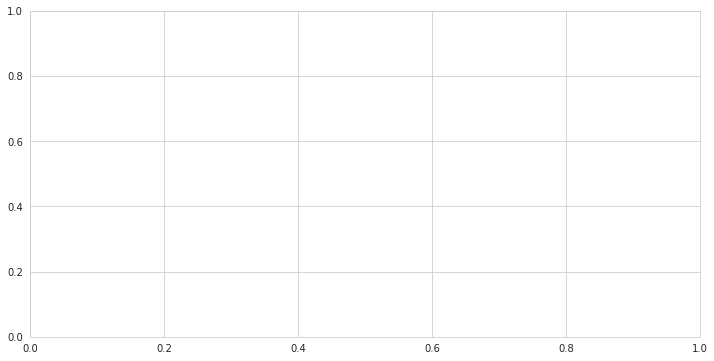

In [ ]:
fig = plt.figure(figsize = (12, 6))
ax = plt.subplot(111)

#Plot the univariate AUC on the training data. Store the AUC

#Student put code here
feature_auc_dict = {}
for col in X_all.columns:
    feature_auc_dict[col] = plotUnivariateROC(X_all[col], y_all, col)


# Put a legend below current axis
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.0 , box.width, box.height * 1])
ax.legend(loc = 'upper center', bbox_to_anchor = (0.5, -0.15), fancybox = True, 
              shadow = True, ncol = 4, prop = {'size':10})

In [ ]:
#Add auc and mi each to a single dataframe
df_auc = pd.DataFrame(pd.Series(feature_auc_dict), columns = ['auc'])
df_imp = pd.DataFrame(pd.Series(feature_imp_dict), columns = ['imp'])

#Now merge the two on the feature name
feat_imp_df = df_auc.merge(df_imp, left_index = True, right_index = True)
feat_imp_df

In [ ]:
#Now create a df that holds the ranks of auc and mi 
feat_ranks = feat_imp_df.rank(axis = 0, ascending = False)

#Plot the two ranks
plt.plot(feat_ranks.auc, feat_ranks.imp, '.')
#Plot a y=x reference line
plt.plot(feat_ranks.auc, feat_ranks.auc,)

In [ ]:
#Now create lists of top 10 features for both auc and mi
top5_auc = list(feat_ranks[(feat_ranks.auc <= 26)].index.values)
top5_imp = list(feat_ranks[(feat_ranks.imp <= 26)].index.values)
for x in zip(top5_auc, top5_imp):
    print (x)

In [ ]:
# Decision tree model
# Decision Tree
clf = DecisionTreeClassifier()

parameters = {'max_depth': [2, 3, 5, 6, 8, 10], 
              'min_samples_split': [10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10, 30],
             }

acc_scorer = make_scorer(accuracy_score)
#grid search
grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_all, y_all)

# Set the clf to the best combination of parameters
clf1 = grid_obj.best_estimator_

clf1.fit(X_all, y_all)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Model performance on training set
y_pred_train =clf1.predict(X_all)

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

accuracy = metrics.accuracy_score(y_all, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy))
cm=confusion_matrix(y_all,y_pred_train)
print('Confusion Matrix: \n', cm)
print(classification_report(y_all, y_pred_train, target_names=class_names))

Accuracy: 0.29
Confusion Matrix: 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


NameError: ignored

In [ ]:
# To view the decision Tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature1,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('gdrive/My Drive/User_Tree.png')
Image(graph.create_png())
export_graphviz(clf1)

In [ ]:
from sklearn.model_selection import cross_val_score
predictions = clf1.predict(X_test)
print(accuracy_score(y_test, predictions))
print(np.array(cross_val_score(clf1, X_train, y_train, cv=10)).mean())
print(f1_score(y_test,predictions))

In [ ]:
clf_probs1 = clf1.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, clf_probs)
print(roc_value)

In [ ]:
roc_value = roc_auc_score(y_test, predictions); roc_value

In [ ]:
im1 = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': clf1.feature_importances_}).sort_values('importance', ascending = False)
im1